In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pytz
from datetime import datetime

df = pd.read_csv('EVChargingStationUsage.csv')

C:\Users\patel\AppData\Local\Temp\ipykernel_780\3491432572.py:8: DtypeWarning: Columns (29,30,32) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('EVChargingStationUsage.csv')


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 259415 entries, 0 to 259414
Data columns (total 33 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   Station Name                     259415 non-null  object 
 1   MAC Address                      259415 non-null  object 
 2   Org Name                         259415 non-null  object 
 3   Start Date                       259415 non-null  object 
 4   Start Time Zone                  259415 non-null  object 
 5   End Date                         259415 non-null  object 
 6   End Time Zone                    259415 non-null  object 
 7   Transaction Date (Pacific Time)  259206 non-null  object 
 8   Total Duration (hh:mm:ss)        259415 non-null  object 
 9   Charging Time (hh:mm:ss)         259415 non-null  object 
 10  Energy (kWh)                     259415 non-null  float64
 11  GHG Savings (kg)                 259415 non-null  float64
 12  Ga

In [20]:
df_processed = df[['Station Name', 'Start Date', 'Start Time Zone', 'Total Duration (hh:mm:ss)', 'Charging Time (hh:mm:ss)', 'Plug Type', 'Port Type']]

df_processed['Station Name'] = df_processed['Station Name'].str.replace(' ', '')

C:\Users\patel\AppData\Local\Temp\ipykernel_780\160727268.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_processed['Station Name'] = df_processed['Station Name'].str.replace(' ', '')


In [21]:
def convert_to_utc(row):
    try:
        # Try parsing with '/' format first
        dt = datetime.strptime(row['Start Date'], "%m/%d/%Y %H:%M")
    except ValueError:
        # If parsing with '/' format fails, use '-' format
        dt = datetime.strptime(row['Start Date'], "%m-%d-%Y %H:%M")

    tz = (
        pytz.timezone('America/Los_Angeles')
        if row['Start Time Zone'] in ('PDT', 'PST')
        else pytz.timezone('UTC')
    )

    return tz.localize(dt).astimezone(pytz.utc)

# Apply the conversion function and create a new column 'datetime_utc'
df_processed['Start Date'] = df_processed.apply(convert_to_utc, axis=1)

# Drop the 'Start Time Zone' column
df_processed.drop(columns=['Start Time Zone'], inplace=True)

C:\Users\patel\AppData\Local\Temp\ipykernel_780\764387220.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_processed['Start Date'] = df_processed.apply(convert_to_utc, axis=1)
C:\Users\patel\AppData\Local\Temp\ipykernel_780\764387220.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_processed.drop(columns=['Start Time Zone'], inplace=True)


In [22]:
df_processed['Start Month'] = df_processed['Start Date'].dt.month

df_processed['Day of Week'] = df_processed['Start Date'].dt.day_name()

df_processed['Minutes Passed From The Day'] = df_processed['Start Date'].dt.hour * 60 + df_processed['Start Date'].dt.minute

# Create a new column waiting time which is difference between total duration and charging time in minutes

df_processed['Waiting Time'] = df_processed['Total Duration (hh:mm:ss)'].str.split(':').apply(lambda x: int(x[0]) * 60 + int(x[1])) - df_processed['Charging Time (hh:mm:ss)'].str.split(':').apply(lambda x: int(x[0]) * 60 + int(x[1]))

C:\Users\patel\AppData\Local\Temp\ipykernel_780\3240637993.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_processed['Start Month'] = df_processed['Start Date'].dt.month
C:\Users\patel\AppData\Local\Temp\ipykernel_780\3240637993.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_processed['Day of Week'] = df_processed['Start Date'].dt.day_name()
C:\Users\patel\AppData\Local\Temp\ipykernel_780\3240637993.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFra

In [24]:
df_processed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 259415 entries, 0 to 259414
Data columns (total 10 columns):
 #   Column                       Non-Null Count   Dtype              
---  ------                       --------------   -----              
 0   Station Name                 259415 non-null  object             
 1   Start Date                   259415 non-null  datetime64[ns, UTC]
 2   Total Duration (hh:mm:ss)    259415 non-null  object             
 3   Charging Time (hh:mm:ss)     259415 non-null  object             
 4   Plug Type                    259415 non-null  object             
 5   Port Type                    259406 non-null  object             
 6   Start Month                  259415 non-null  int64              
 7   Day of Week                  259415 non-null  object             
 8   Minutes Passed From The Day  259415 non-null  int64              
 9   Waiting Time                 259415 non-null  int64              
dtypes: datetime64[ns, UTC](1), int64

<Axes: xlabel='Energy (kWh)'>

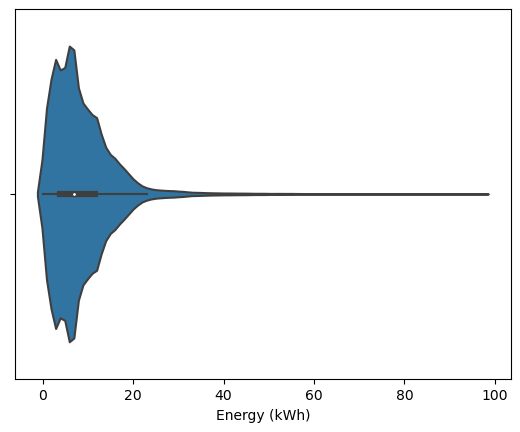

In [17]:
sns.violinplot(x=df['Energy (kWh)'])


<Axes: xlabel='GHG Savings (kg)'>

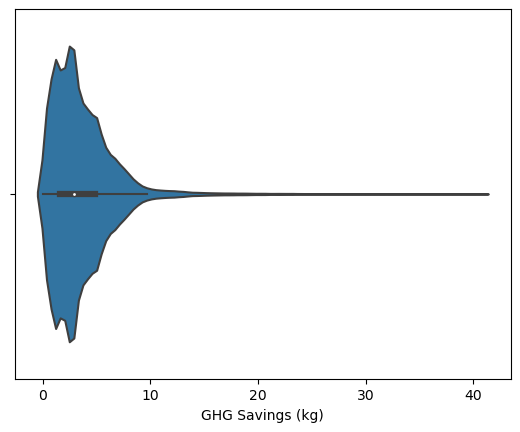

In [18]:
sns.violinplot(x=df['GHG Savings (kg)'])


<Axes: xlabel='Gasoline Savings (gallons)'>

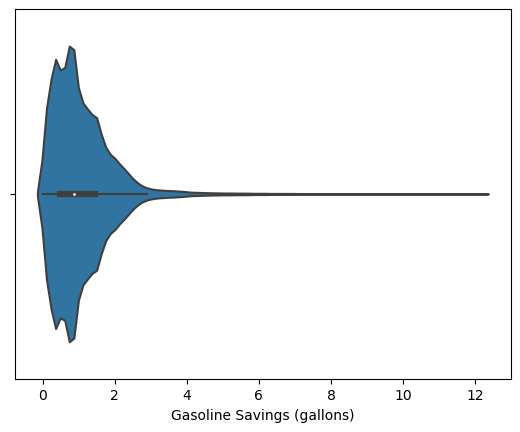

In [19]:
sns.violinplot(x=df['Gasoline Savings (gallons)'])

<Axes: xlabel='Minutes Passed From The Day'>

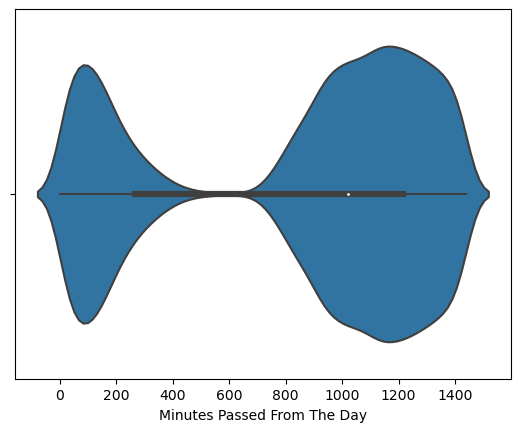

In [26]:
sns.violinplot(x=df_processed['Minutes Passed From The Day'])

<Axes: xlabel='Fee'>

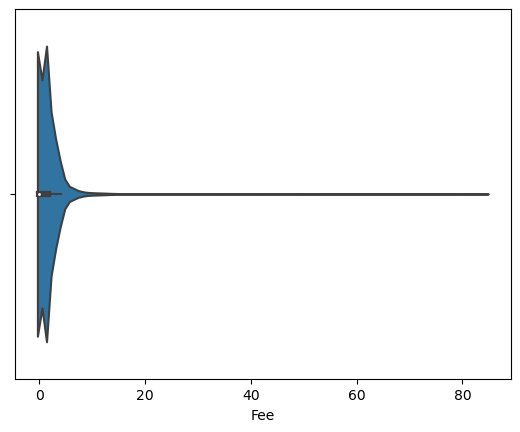

In [27]:
sns.violinplot(x=df['Fee'])

<Axes: xlabel='Waiting Time'>

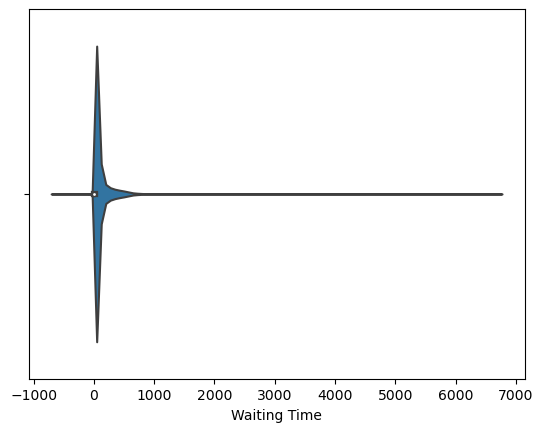

In [29]:
sns.violinplot(x=df_processed['Waiting Time'])